## _**Sleep health and lifestyle dataset**_

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, pearsonr, spearmanr,kruskal,ttest_ind,f_oneway
from scipy.stats import mannwhitneyu

1.Exploratory data analysis

In [3]:
sleep = pd.read_csv('data/sleep_health_and_lifestyle_dataset.csv')

print(sleep.info())
print(sleep.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
        Person ID

In [4]:
sleep.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [5]:
sleep.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [6]:
sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [8]:
print(sleep.isnull().sum())
sleep.dropna(inplace=True)

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


2.Hypothesis testing

shapiro Test Statistic: 0.8203997307409343, p-value = 7.400945733045046e-10


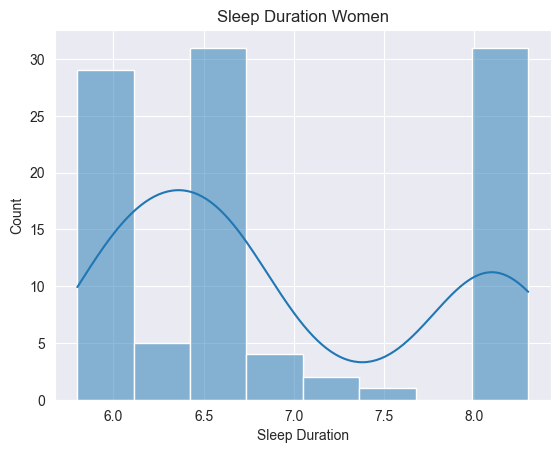

In [9]:
SleapDurationWomen = sleep[sleep["Gender"] == "Female"]["Sleep Duration"]

stat, p = shapiro(SleapDurationWomen)
print(f"shapiro Test Statistic: {stat}, p-value = {p}")

sns.histplot(SleapDurationWomen,kde=True)
plt.title("Sleep Duration Women")
plt.show()

3.Investigating the correlation between daily step count and sleep quality

pearson correlation: 0.025166371782313623, p-value = 0.7559284530697943


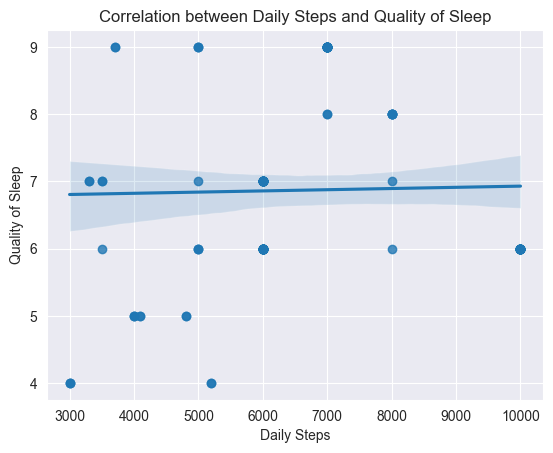

In [36]:
corr_pearson, p_pearson = pearsonr(sleep["Daily Steps"],sleep["Quality of Sleep"])

print(f"pearson correlation: {corr_pearson}, p-value = {p_pearson}")

sns.regplot(x=sleep["Daily Steps"],y=sleep["Quality of Sleep"])
plt.title("Correlation between Daily Steps and Quality of Sleep")
plt.xlabel("Daily Steps")


plt.ylabel("Quality of Sleep")
plt.show()

4.Examining differences in stress levels across various occupations

Occupation
Nurse                   64
Teacher                 31
Salesperson             30
Doctor                   7
Accountant               7
Engineer                 6
Lawyer                   5
Sales Representative     2
Scientist                2
Software Engineer        1
Name: count, dtype: int64
ANOVA Test Statistic: 4.28083568649616, p-value = 6.031583328679093e-05


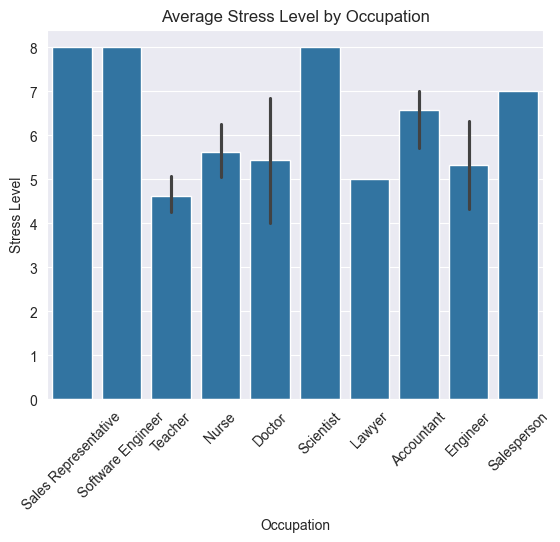

In [11]:
print(sleep["Occupation"].value_counts())

groups = [sleep[sleep["Occupation"] == occ]["Stress Level"] for occ in sleep["Occupation"].unique()]
stat, p = f_oneway(*groups)

print(f"ANOVA Test Statistic: {stat}, p-value = {p}")

sns.barplot(x=sleep["Occupation"],y=sleep["Stress Level"])
plt.xticks(rotation=45)
plt.title("Average Stress Level by Occupation")
plt.show()

5.Examining differences in blood pressure across BMI categories

ANOVA Test(Systolic) Statistic = 25.080190737484205, p-value = 3.1826863665111366e-13
ANOVA Test(Diastolic) Statistic = 17.184776961411238, p-value = 1.1841337855904489e-09


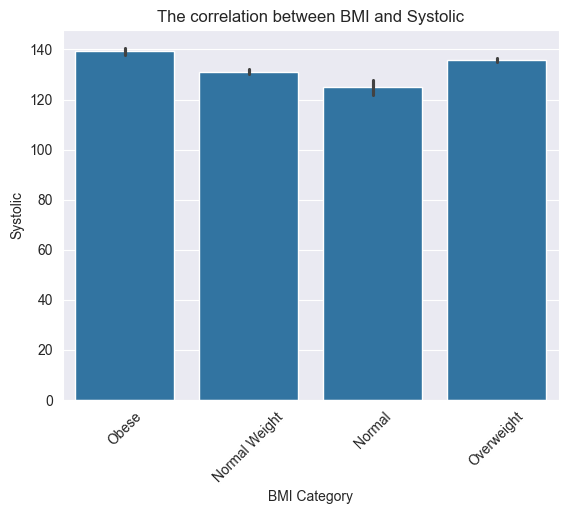

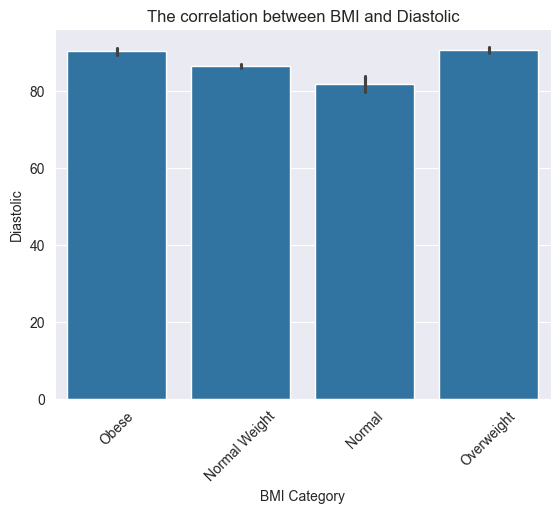

In [12]:
sleep[["Systolic","Diastolic"]] = sleep["Blood Pressure"].str.split("/",expand=True).astype("float")

groups_sys = [sleep[sleep["BMI Category"] == cat]["Systolic"] for cat in sleep["BMI Category"].unique()]

stat_sys, p_sys = f_oneway(*groups_sys)
print(f"ANOVA Test(Systolic) Statistic = {stat_sys}, p-value = {p_sys}")

groups_dias = [sleep[sleep["BMI Category"] == cat]["Diastolic"] for cat in sleep["BMI Category"].unique()]

stat_dias, p_dias = f_oneway(*groups_dias)
print(f"ANOVA Test(Diastolic) Statistic = {stat_dias}, p-value = {p_dias}")

sns.barplot(x=sleep["BMI Category"],y=sleep["Systolic"])
plt.xticks(rotation=45)
plt.title("The correlation between BMI and Systolic")
plt.show()

sns.barplot(x=sleep["BMI Category"],y=sleep["Diastolic"])
plt.xticks(rotation=45)
plt.title("The correlation between BMI and Diastolic")
plt.show()

6.Examining the impact of sleep disorders on heart rate

In [34]:
disorder = sleep[sleep["Sleep Disorder"].notnull()]["Heart Rate"]
no_disorder = sleep[sleep["Sleep Disorder"].isnull()]["Heart Rate"]

stat, p = mannwhitneyu(disorder, no_disorder)
print(f"Statistic: {stat} & P-value: {p}")

print(f"Mean Heart Rate (Disorder): {disorder.mean()}")
print(f"Mean Heart Rate (No Disorder): {no_disorder.mean()}")

Statistic: nan & P-value: nan
Mean Heart Rate (Disorder): 71.78709677419354
Mean Heart Rate (No Disorder): nan


C:\Users\victus\AppData\Local\Temp\ipykernel_30812\2703936966.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(disorder, no_disorder)


Bonus.1.Does sleep duration increase with age?

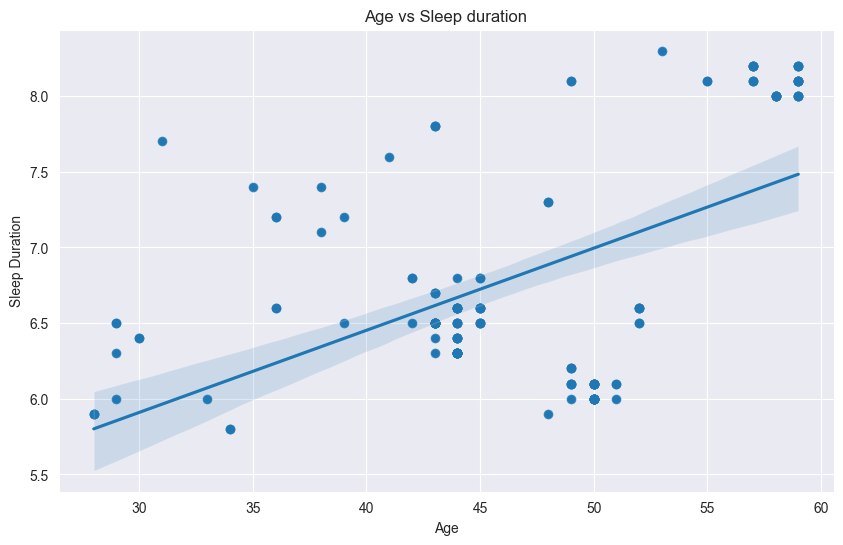

Correlation between Age and Sleep duration: 0.5501927193870066
Correlation: 0.5501927193870061, P-value: 1.2110661909716316e-13


In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=sleep["Age"], y=sleep["Sleep Duration"])

sns.regplot(x=sleep["Age"], y=sleep["Sleep Duration"])

plt.title('Age vs Sleep duration')

plt.show()

correlation = sleep.Age.corr(sleep["Sleep Duration"])
print(f'Correlation between Age and Sleep duration: {correlation}')

stat, p = pearsonr(sleep['Age'], sleep["Sleep Duration"])
print(f'Correlation: {stat}, P-value: {p}')

Bonus.2.Examining the relationship between stress levels and sleep quality

pearson correlation between stress level and sleep quality: -0.8720838618310153, p-value = 2.399509519269688e-49


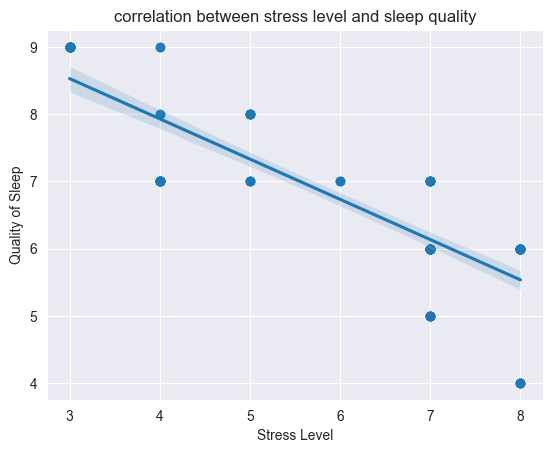

In [33]:
corr_stress, p_stress = pearsonr(sleep["Stress Level"], sleep["Quality of Sleep"])

print(f"pearson correlation between stress level and sleep quality: {corr_stress}, p-value = {p_stress}")

sns.regplot(x=sleep["Stress Level"], y=sleep["Quality of Sleep"])
plt.title("correlation between stress level and sleep quality")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.show()

Bonus.3.Comparing Activity level between occupations

Statistic: 36.26607466580059, p-value: 6.624303123892121e-33


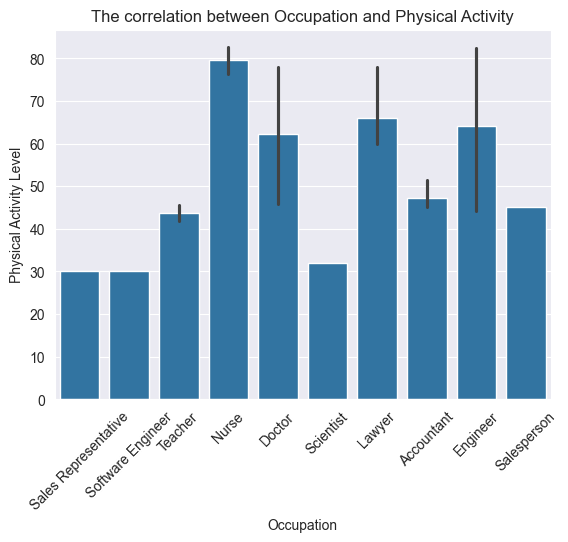

In [19]:
occupations = sleep["Occupation"].unique()
occupation_groups = [sleep[sleep["Occupation"]== i]["Physical Activity Level"] for i in occupations]

stat, p = f_oneway(*occupation_groups)
print(f'Statistic: {stat}, p-value: {p}')

sns.barplot(x=sleep["Occupation"],y=sleep["Physical Activity Level"])
plt.xticks(rotation=45)
plt.title("The correlation between Occupation and Physical Activity")
plt.show()